# Convolutional Neural Networks (CNNs)

is a type of neural network well-suited for image classification and recognition tasks. They are composed of layers of neurons, with each layer responsible for detecting specific patterns in the data. The first layer is responsible for detecting low-level features, such as edges and corners, while subsequent layers detect increasingly complex features. CNNs can be trained using various deep learning modules, but one of the most popular is **TensorFlow**. TensorFlow is an open-source software library that allows developers to create CNNs easily.

A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning which learns directly from data, eliminating the need for manual feature extraction. CNN is handy for finding patterns in images to recognize objects, faces, and scenes. However, they can also be quite effective for classifying non-image data such as audio

A convolutional neural network can have tens or hundreds of layers that each learns to detect different features of an image. Filters are applied to each training image at different resolutions, and the output of each convolved image is used as the input to the next layer. In the context of a convolutional neural network, convolution is a linear operation that involves the multiplication of a set of weights with the input, much like a traditional neural network. Given that the technique was designed for two-dimensional input, the multiplication is performed between an array of input data and a two-dimensional array of weights, called a **filter or a kernel**.

# Different types of images

The three most common types of images used in convolutional neural networks are:

*   Binary image
*   Grayscale image
*   Colored image

1. A binary image is an image that contains exactly two colors, such as white and 
black. Binary images are also called bi-level or two-level. Each pixel is stored as a single bit- 0 or 1 .

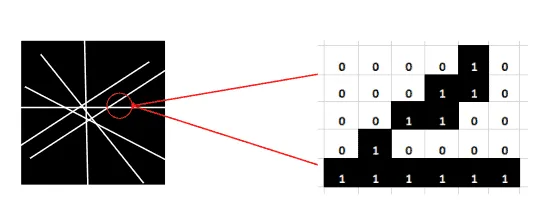

2. While a Grayscale image is an image that contains a range(0, 255) of shades of gray without the color, the darkest possible shade is black, and the lightest possible shade is white. The matrix of grayscale image data represents intensities within some range.

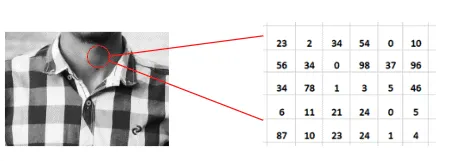

While colored images, also known as RGB, can be viewed as three different images(a red scale image, a green scale image, and a blue scale image) stacked on top of each other. Such images are more complex as they contain more information. The sample image below shows an RGB image.

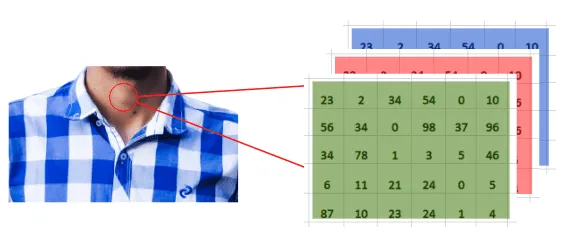


# What is padding in a convolutional neural network
Convolution is a mathematical way of combining two signals to form a third signal. But in Artificial Neural Networks, it is fundamental to many common image processing operators. Convolution provides a way of multiplying two arrays/matrices of numbers, generally of different sizes, but producing a third array of numbers of the same dimensionality.

Let’s assume that we have the following two matrices, multiplying to get the third matrix.

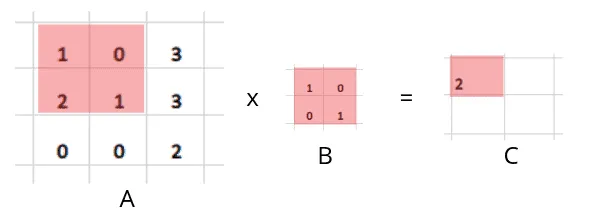

In image processing, matrix A represents information about an image, and matrix B is any filter. In image processing, filters are mainly used to suppress either the high frequencies in the image, i.e., smoothing the image, or the low frequencies, i.e., enhancing or detecting edges in the picture. But as you can see, when we applied filtering to the above image ( multiplied A with B), we got an image of fewer dimensions as compared to the original image. The original image was 3×3, and after applying a filter to detect high or low frequencies in an image, it reduces to a 2×2 matrix. This is where the padding comes to help us.

**Padding** describes the addition of empty pixels around the edges of an image. The purpose of padding is to preserve the original size of an image when applying a convolutional filter and enable the filter to perform full convolutions on the edge pixels. For example, see the image processing below, where we applied filtering and padding on an image ( Matrix A) to obtain the same size result.

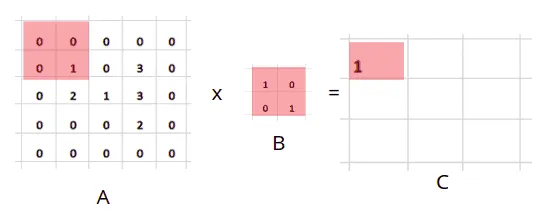

original matrix size was 3×3, but we added a new layer of empty pixels around the image (padding) and then applied it to the filter to get an image size of 3×3 again.

# What is pooling in a convolutional neural network
Pooling in convolutional neural networks is a technique for generalizing features extracted by convolutional filters and helping the network recognize features independent of their location in the image. **The main purpose of the pooling layer** is to progressively reduce the spatial size of the input image, reducing the number of computations in the network. Pooling downsamples by reducing the size and sending only the important data to the next layers in CNN.

There are two types of pooling in a convolutional neural network; Max Pooling and Average Pooling. In max pooling, we consider only the maximum value for the next convolutional layer, while in average pooling, we take the average of the values. See the example below of Max pooling and Average pooling.

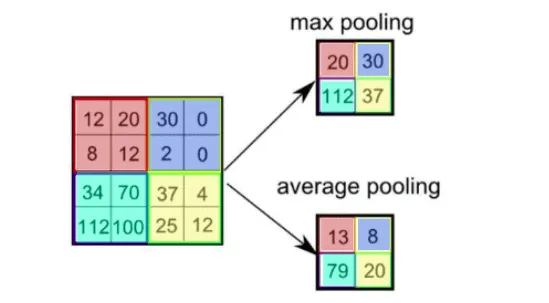

in Max pooling, we only take the maximum value for the next layer, while in average pooling, we take the average of the values for the next layer. Both of them reduce the size of the image while retaining important information.

# The architecture of the fully connected layer of CNN
Now we have a basic understanding of how different processes are performed on the matrix of images in CNN. Let us now understand the fully connected convolutional neural network step by step.

Like any other neural network, a convolutional neural network consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of convolutional layers that convolve with multiplication or other dot product, and ReLU is mainly applied as an activation function. The reason for using the ReLU activation function is that it converts any negative value to zero. We know the image matrix cannot contain negative values, so if there are any negative values in the matrix because of processing, the ReLU function will transform them into non-negative values.

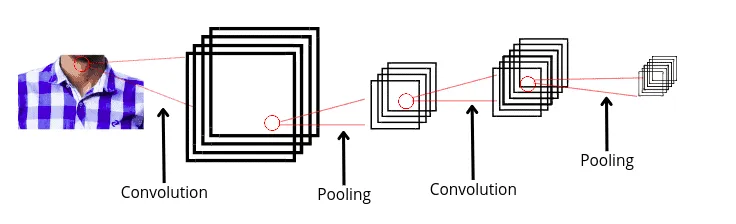

Once we are done with the filtering and pooling process, the last step before feeding the image to the neural network is **flatten** the matrix. The flattening step is a refreshingly simple step involved in building a convolutional neural network. It involves taking the pooled feature map generated in the pooling step and transforming it into a one-dimensional vector. So, in simple words, flattening converts an NxN matrix into a one-dimensional array.

The following figure shows a full architecture of CNN, from image processing to feeding to the neural network.

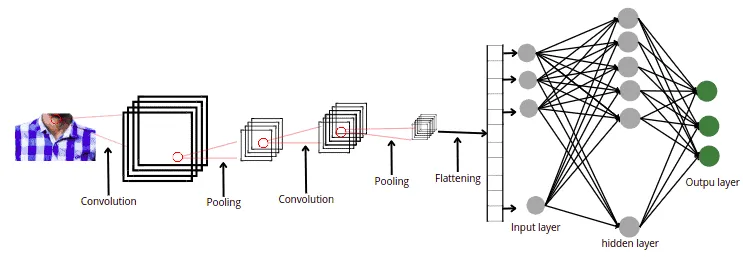

We will now build a convolutional neural network in TensorFlow on the grayscale and colored image using the abovementioned steps.

# Classification of Grayscale images using Tensorflow

implementation and build a convolutional neural network that will help us to classify grayscale images. In this section, we will be using the Fashion MNIST dataset. The dataset contains 70000 examples, each example is a 28×28 grayscale image, associated with a label from 10 classes. You can read more about the dataset from this [github](https://github.com/zalandoresearch/fashion-mnist).

# Importing and exploring the dataset
The Fashion MNIST dataset is inside the submodule of TensorFlow. We can quickly load it from there.

*   TensorFlow
*   Keras
*   NumPy
*   matplotlib
*   pandas

install the above modules

`Loading the dataset`

In [ ]:
# importing TensorFlow
import tensorflow as tf

# loading the fashion mnist data
fashion_mnist = tf.keras.datasets.fashion_mnist

We will assign the training and testing data to respective variables in the next step.

`Splitting the dataset`

In [ ]:
# Splitting the dataset into testing and training parts
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


check the shape of the training dataset and labels.

`Dataset shape`

In [ ]:
#shape of dataset
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


there is a total of 60000 images, each containing a 28×28 matrix. Now, let us visualize each of the images available in the dataset.

`Plotting the output classes`

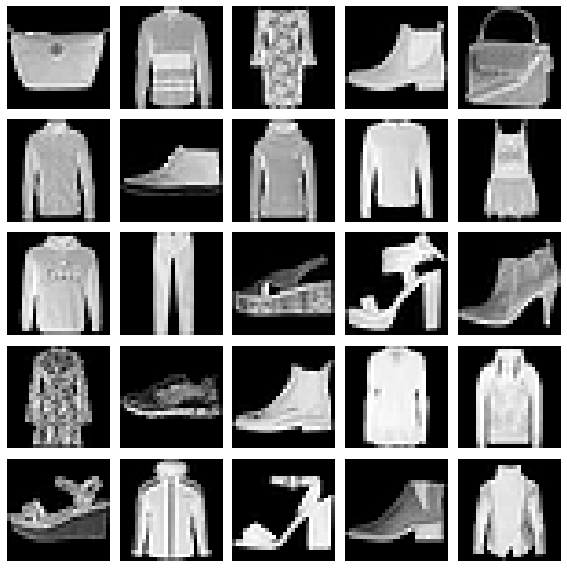

In [ ]:
# importing the modules
import matplotlib.pyplot as plt
import numpy as np

#ceating columns and rows 
columns = 5
rows = 5

# fixing the size of plot
fig = plt.figure(figsize=(8, 8))

# using for loop to iterate
for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28, 28])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

Now, apply a simple preprocessing step because if we inspect an individual image, we will see that the pixel values fall in the range of 0 to 255

`Plotting image`

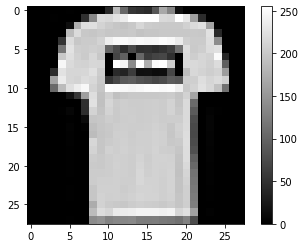

In [ ]:
# plotting one image frrom the data
plt.figure()
plt.imshow(train_images[1], cmap='gray')

# printing the color bar
plt.colorbar()
plt.grid(False)
plt.show()

the pixel values are from 0 to 255. We will scale these values from 0 to 1 before feeding them to the neural network model.

`Scaling the data`

In [ ]:
# divide by 255 to range from 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

With this, our data is ready to be used for a Convolutional neural network.

# Building convolutional neural network
now use the TensorFlow module to build the CNN. Let us first initialize the model with one hidden layer.

`Creating CNN model`

In [ ]:
# initializing the model
model = tf.keras.Sequential([
    # flattening the layers to have an image size of 28x28
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Adding dense layer with 128 nodes
    tf.keras.layers.Dense(128, activation='relu'),

    # adding output  layer with 10 nodes
    tf.keras.layers.Dense(10)
])

The first layer ```Flatten```, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array. Then we added a hidden layer consisting of 128 nodes, and the activation function is ReLU. The last layer is the output layer, and as you can see, we have specified the number of nodes as 10 as we have a total of 10 categories of output data.

The next step is to compile the above-created neural network. The compiling model requires three main parameters.


The loss function measures how accurate the model is during training. The ```optimizer``` is used to update the model based on the data it sees and its loss function. And finally, the ```matrice``` is used to monitor the training and testing steps.

`Compiling the model`

In [ ]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training and testing the model
Now we will train the model using the training dataset. We will fix the epoch value to be 10. You can change this value to get an optimized result.

`Training the model`

In [ ]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5015 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9028
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2560 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

now, we can use the testing data to find the accuracy of the classifications.

`Accuracy score`

In [ ]:
# finding the test accuracy
test_acc = model.evaluate(test_images,  test_labels)

# printing the accuracy
print('Test accuracy:', test_acc[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8801
Test accuracy: 0.8801000118255615


i got an accuracy score of 81%, which means our model could classify 81% of the testing data correctly.

# Classification of colored images using TensorFlow
Now, we will create a convolutional neural network to classify colored images using TensorFlow. As we know, colored images are more complex and contain more information, so how to add filters and pooling process in TensorFlow.

we will be using **CIFAR images**. The dataset consists of 60000 32×32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images

# Loading and exploring the dataset
The TensorFlow’s datasets module also contains colored images. So, we will load it from there and split it into training and testing parts.

`Loading dataset`

In [ ]:
# loading both trained and test data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


check the shape of the training dataset

`Shape of training dataset`

In [ ]:
# printing the shape 
print(train_images.shape)

(50000, 32, 32, 3)


This shows that our dataset contains 50000 examples of 32×32 matrix, and the 3 show that they are RBG/colored images.

use plot the first 15 images from the training dataset.

`Plotting images`

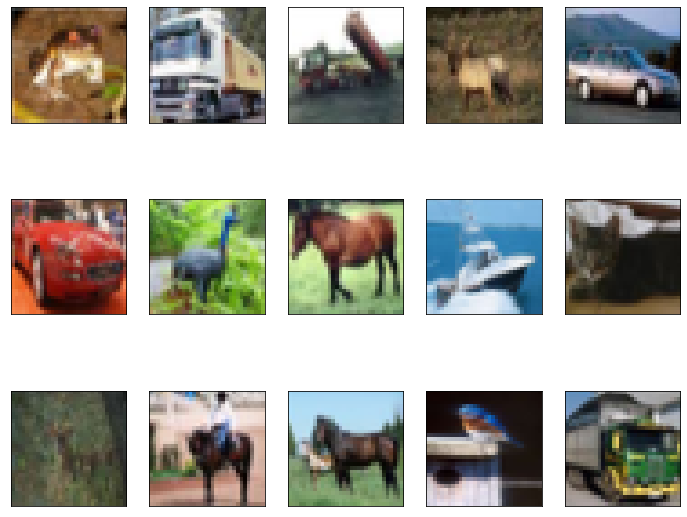

In [ ]:
# figure size
plt.figure(figsize=(12,10))

# looping for first 15 images
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

We will also scale the images to have values from 0 to 1 by dividing 255.

`Scaling the data`

In [ ]:
# Normalize 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Now, let us understand how pooling and padding are useful and how they affect the size of images.

# Understanding the effect of padding and pooling
Before building the convolutional neural network, we will apply some preprocessing techniques, including filtering and pooling, as we discussed earlier.

We will initialize the model and then apply a filter of a 3×3 matrix. We also need to specify the input image size( 32, 32, 3).

`Applying filters`

In [ ]:
# initializing the model
model = tf.keras.models.Sequential()

# applying filter of size 3 by 3 and total of 32 filters
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

Now, we will only use the Max pooling method to get the important feature. And the size of the max-pooling matrix is 2 by 2.

`Pooling method`

In [ ]:
# adding pooling method
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

Let us summarize the model to see how the pooling and filtering have affected the images.

`summary of the model`

In [ ]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Here are two things to note. First, notice that the output shape of the matrices after filtering is 30 by 30, whereas the original size was 32 by 32. It is because we didn’t apply any padding method. Secondly, as you can see, the pooling has even reduced the size to 15 by 15.

Let us now create another model, apply the same steps above with padding and see the differences.

`Padding`

In [ ]:
# initializing the model
model1 = tf.keras.models.Sequential()

# applying filter of size 3 by 3 and total of 32 filters
model1.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# adding pooling method
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


As you can see, the filtering does not affect the matrix size this time as we have applied the padding.

# Building a fully connected convolutional neural network
Let us now create a fully connected convolutional neural network. We will apply filtering and max-pooling before the hidden layers.

`Fully connected convolution network`

In [ ]:
# building model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# flattening the input matrix
model.add(tf.keras.layers.Flatten())

# applying hidden layer with 32 nodes
model.add(tf.keras.layers.Dense(32, activation='relu'))

# output layer with 10 nodes
model.add(tf.keras. layers.Dense(10))

As you can see, we applied two filters with one pooling layer. Then we used the flattening layer to convert the input matrices to a one-dimensional array. We also have assigned 32 nodes in the hidden layer and 10 nodes in the output layer as there are 10 different categories in the output class.

Now, we will compile and train the model on the training images.

`Training model`

In [ ]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fitting model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.4392 - accuracy: 0.4875
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0484 - accuracy: 0.6344
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8985 - accuracy: 0.6891
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8030 - accuracy: 0.7205
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7216 - accuracy: 0.7480
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6469 - accuracy: 0.7767
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5844 - accuracy: 0.7952
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5267 - accuracy: 0.8164
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4668 - accuracy: 0.8362
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.42

As you can see, we have specified the epochs to be 10. You can change this value to get the optimum result or use the parameter tuning method to get the optimum epoch value.

Let us also test our model and find out the accuracy score.

`Accuracy score`

In [ ]:
# finding the test accuracy
test_acc = model.evaluate(test_images,  test_labels)

# printing the accuracy
print('Test accuracy:', test_acc[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.1555 - accuracy: 0.6677
Test accuracy: 0.6676999926567078


As you can see, we get an accuracy score of 67%, which is pretty low. The reason is that we have randomly selected the number of the hidden layer, nodes, and epoch value. You can use the tunning parameter method to find the optimum values for these parameters and get a better result.

# Summary
Convolutional Neural Network or CNN is a type of artificial neural network widely used for image/object recognition and classification.

we learned how to build a convolutional neural network and how it works. We also used TensorFlow to make a predictive model for grayscale and colored images.

# References